In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"Documents/Position_Salaries.csv")

In [3]:
X = df.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
Y =  df.iloc[:,-1].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
Lin_reg = LinearRegression()
result = Lin_reg.fit(X,Y)
Y_pred = result.predict(X)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
Poly_reg = PolynomialFeatures(degree=4)
X_ploy = Poly_reg.fit_transform(X)

In [8]:
Lin_reg = LinearRegression()
result_ploy = Lin_reg.fit(X_ploy,Y)
Y_poly = result_ploy.predict(X_ploy)

In [9]:
result.predict([[6.5]])

array([330378.78787879])

In [10]:
result_ploy.predict(Poly_reg.fit_transform([[6.5]]))

array([158862.45265153])

Text(0, 0.5, 'Salary')

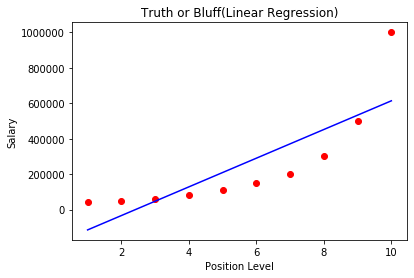

In [11]:
plt.scatter(X,Y, color = 'red')
plt.plot(X, Y_pred, color = 'blue')
plt.title("Truth or Bluff(Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

<function matplotlib.pyplot.show(*args, **kw)>

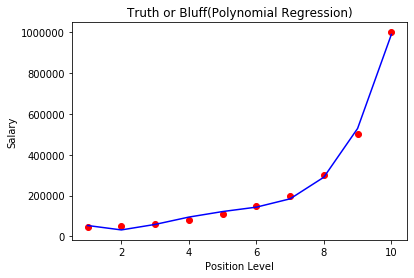

In [12]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, Y_poly , color = 'blue')
plt.title("Truth or Bluff(Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show

## SVR ( Linear Support Vectors)

In [13]:
df = pd.read_csv(r"Documents/Position_Salaries.csv")

In [14]:
X = df.iloc[:,1:2].values
Y =  df.iloc[:,-1].values

## Feature Scaling

In [15]:
 y = Y.reshape(len(Y), 1)

In [16]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [17]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

In [19]:
X = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)

In [20]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [21]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

In [25]:
result = regressor.fit(X, y)

C:\Users\Sukanya\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

Text(0, 0.5, 'Salary')

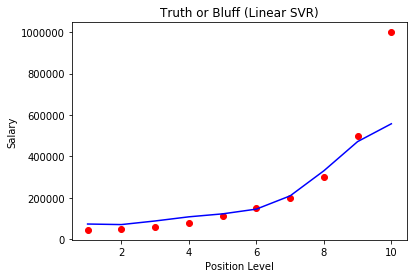

In [28]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title("Truth or Bluff (Linear SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")